<a href="https://colab.research.google.com/github/Gatuha/Customer-Personality-Analysis/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kneed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Importing the basic librarires for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import datetime
import calendar
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/marketing_campaign.csv', sep="\t")

df.shape

(2240, 29)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#Data preprocessing

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

only one column with null values

In [ ]:
missing=df.groupby(["Education","Marital_Status"])["Income"].transform("mean").round(0)
df["Income"].fillna(missing, inplace= True)

In [ ]:
df.describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0,2240.00
mean,5592.16,1968.81,52248.75,0.44,0.51,49.11,303.94,26.30,166.95,37.53,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.0,11.0,0.15
std,3246.66,11.98,25039.98,0.54,0.54,28.96,336.60,39.77,225.72,54.63,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.0,0.0,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
25%,2828.25,1959.00,35538.75,0.00,0.00,24.00,23.75,1.00,16.00,3.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
75%,8427.75,1977.00,68289.75,1.00,1.00,74.00,504.25,33.00,232.00,50.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.0,11.0,1.00


In [ ]:
#check if there any duplication
df.duplicated().sum()

0

In [ ]:
# we have 182 duplication values, we should droping this values

df.drop_duplicates(inplace=True)

In [ ]:
#let check what we have unique values in columns/ category columns
for i in df.columns:
    if df[i].dtypes == 'O':
        print (f"We have in column {i} unique values : {  df[i].unique()}")

We have in column Education unique values : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
We have in column Marital_Status unique values : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
We have in column Dt_Customer unique values : ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-09-2012'
 '18-02-201

In [ ]:
# Assuming df is your DataFrame and it contains a column "Year_Birth"
# Calculate current year
current_year = datetime.datetime.now().year

# Calculate age and create a new column
df['Age'] = current_year - df['Year_Birth']


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [ ]:
columns_order = ['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome',  'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       ]

# Set 'Dt_Customer' as index followed by the specified columns
df = df.set_index('Dt_Customer')[columns_order]

# Sort the DataFrame by 'Dt_Customer' index in ascending order
df = df.sort_index()


In [ ]:
df.head(4)

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Dt_Customer,,,,,,,,,,,,,,,,,,,,,
01-01-2013,8162,68,Master,Together,14661.0,0,0,88,4,1,...,6,0,0,0,0,0,0,3,11,0
01-01-2013,7261,53,Graduation,Together,34600.0,1,1,8,199,33,...,8,0,0,0,0,0,0,3,11,1
01-01-2013,2452,53,Graduation,Together,34600.0,1,1,8,199,33,...,8,0,0,0,0,0,0,3,11,1
01-01-2013,10637,60,Graduation,Married,40800.0,1,2,77,24,0,...,7,0,0,0,0,0,1,3,11,0


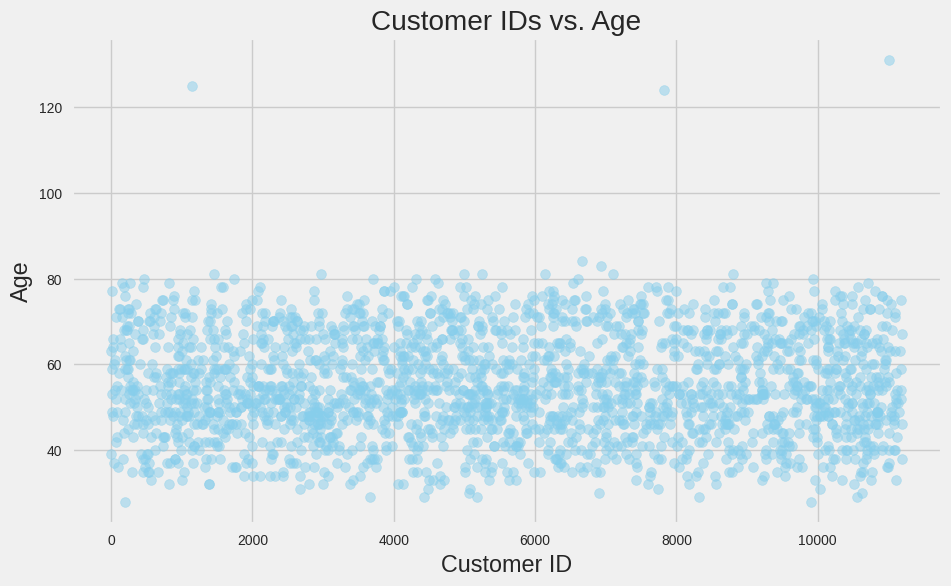

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot Customer_ID against Age
plt.scatter(df['ID'], df['Age'], alpha=0.5, color='skyblue')  # Use alpha to adjust transparency
plt.title('Customer IDs vs. Age')  # Set the title
plt.xlabel('Customer ID')  # Set the label for the x-axis
plt.ylabel('Age')  # Set the label for the y-axis
plt.grid(True)  # Show grid
plt.show()  # Show the plot

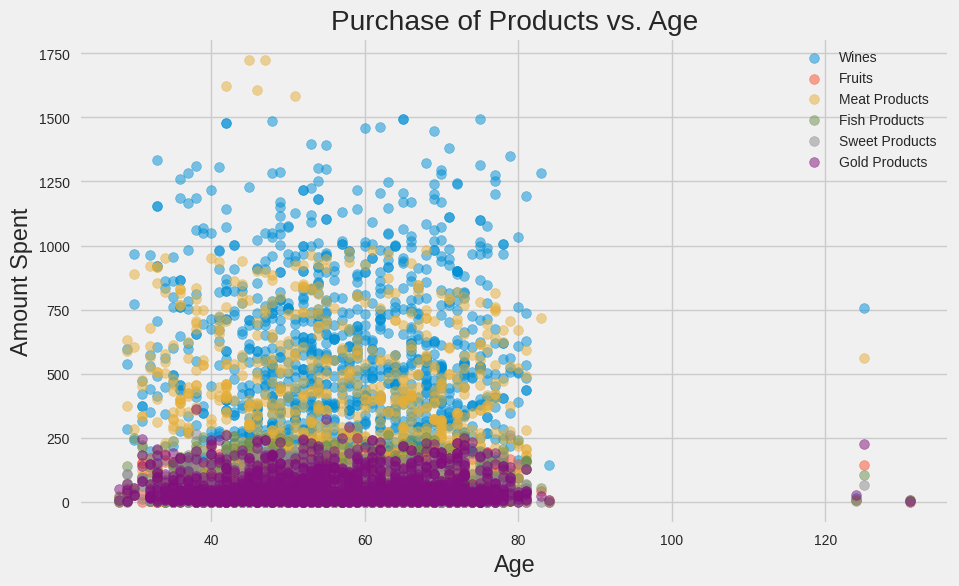

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot each product against Age
plt.scatter(df['Age'], df['MntWines'], label='Wines', alpha=0.5)
plt.scatter(df['Age'], df['MntFruits'], label='Fruits', alpha=0.5)
plt.scatter(df['Age'], df['MntMeatProducts'], label='Meat Products', alpha=0.5)
plt.scatter(df['Age'], df['MntFishProducts'], label='Fish Products', alpha=0.5)
plt.scatter(df['Age'], df['MntSweetProducts'], label='Sweet Products', alpha=0.5)
plt.scatter(df['Age'], df['MntGoldProds'], label='Gold Products', alpha=0.5)

plt.title('Purchase of Products vs. Age')  # Set the title
plt.xlabel('Age')  # Set the label for the x-axis
plt.ylabel('Amount Spent')  # Set the label for the y-axis
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Show the plot

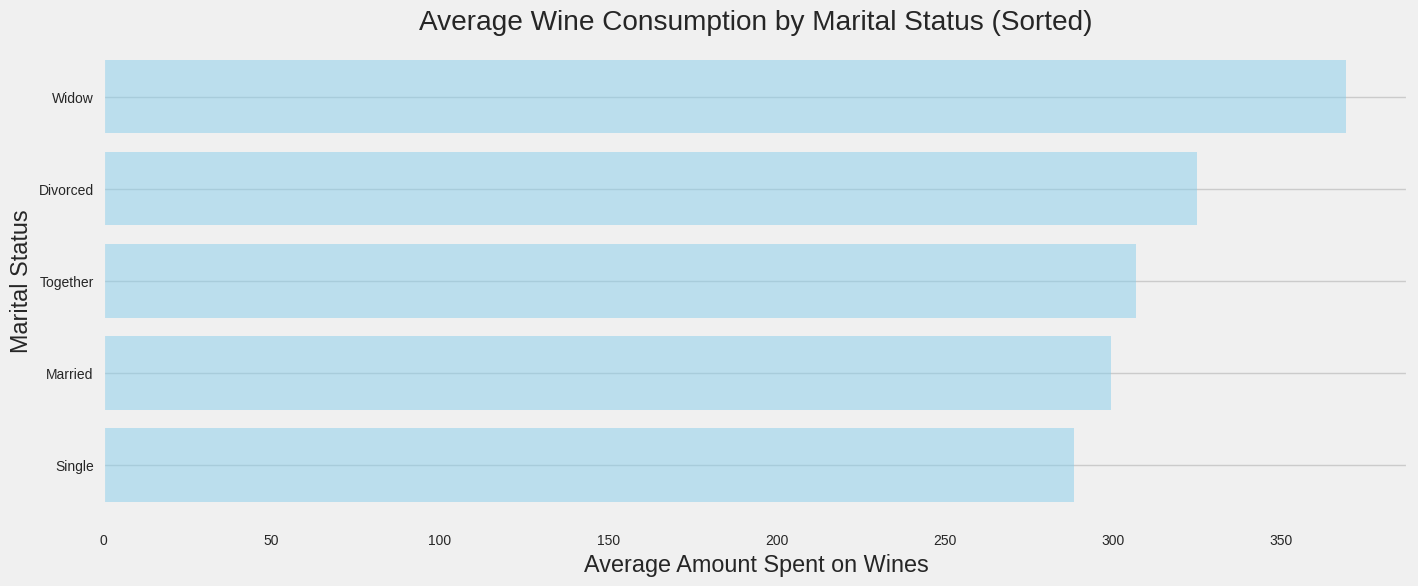

In [ ]:
# Define marital statuses to plot
marital_statuses = ['Married', 'Single', 'Together', 'Divorced', 'Widow']

# Calculate average wine consumption for each marital status
average_wine_consumption = [df[df['Marital_Status'] == status]['MntWines'].mean() for status in marital_statuses]

# Sort marital statuses and average wine consumption values together
sorted_data = sorted(zip(marital_statuses, average_wine_consumption), key=lambda x: x[1])

# Unzip sorted data
sorted_marital_statuses, sorted_average_wine_consumption = zip(*sorted_data)

# Plot horizontal bar plot for average wine consumption by marital status
plt.figure(figsize=(15, 6))  # Set the figure size
plt.barh(sorted_marital_statuses, sorted_average_wine_consumption, alpha=0.5, color='skyblue')

plt.title('Average Wine Consumption by Marital Status (Sorted)')  # Set the title
plt.xlabel('Average Amount Spent on Wines')  # Set the label for the x-axis
plt.ylabel('Marital Status')  # Set the label for the y-axis
plt.grid(axis='x')  # Show grid on x-axis
plt.show()  # Show the plot



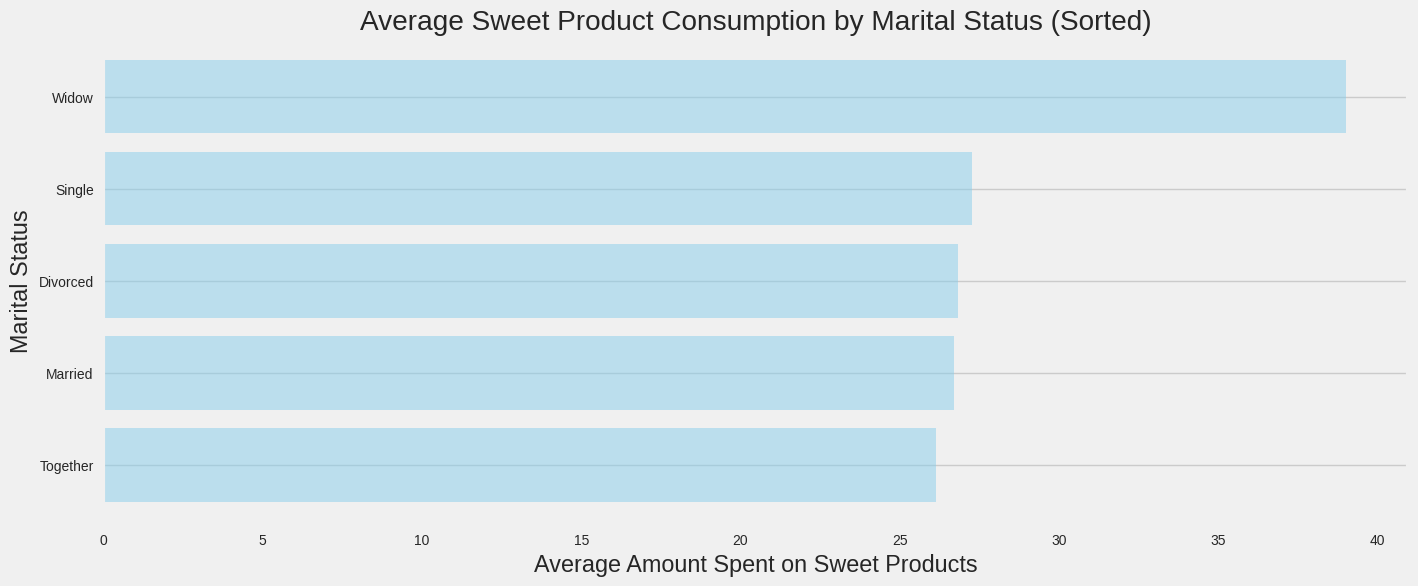

In [ ]:
# Define marital statuses to plot
marital_statuses = ['Married', 'Single', 'Together', 'Divorced', 'Widow']

# Calculate average sweet product consumption for each marital status
average_sweet_consumption = [df[df['Marital_Status'] == status]['MntSweetProducts'].mean() for status in marital_statuses]

# Sort marital statuses and average sweet consumption values together
sorted_data = sorted(zip(marital_statuses, average_sweet_consumption), key=lambda x: x[1])

# Unzip sorted data
sorted_marital_statuses, sorted_average_sweet_consumption = zip(*sorted_data)

# Plot horizontal bar plot for average sweet product consumption by marital status
plt.figure(figsize=(15, 6))  # Set the figure size
plt.barh(sorted_marital_statuses, sorted_average_sweet_consumption, alpha=0.5, color='skyblue')

plt.title('Average Sweet Product Consumption by Marital Status (Sorted)')  # Set the title
plt.xlabel('Average Amount Spent on Sweet Products')  # Set the label for the x-axis
plt.ylabel('Marital Status')  # Set the label for the y-axis
plt.grid(axis='x')  # Show grid on x-axis
plt.show()  # Show the plot


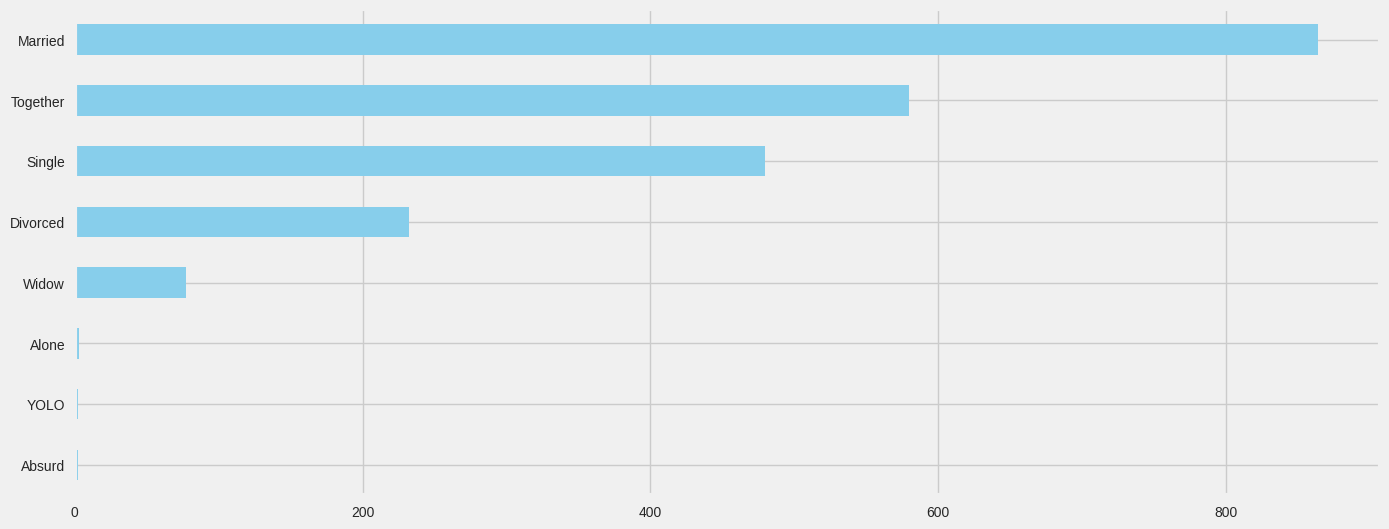

In [ ]:
# Calculate value counts and sort them
sorted_counts = df["Marital_Status"].value_counts().sort_values()

# Plot the sorted counts
plt.figure(figsize=(15, 6))
sorted_counts.plot(kind="barh",color='skyblue')
plt.show()

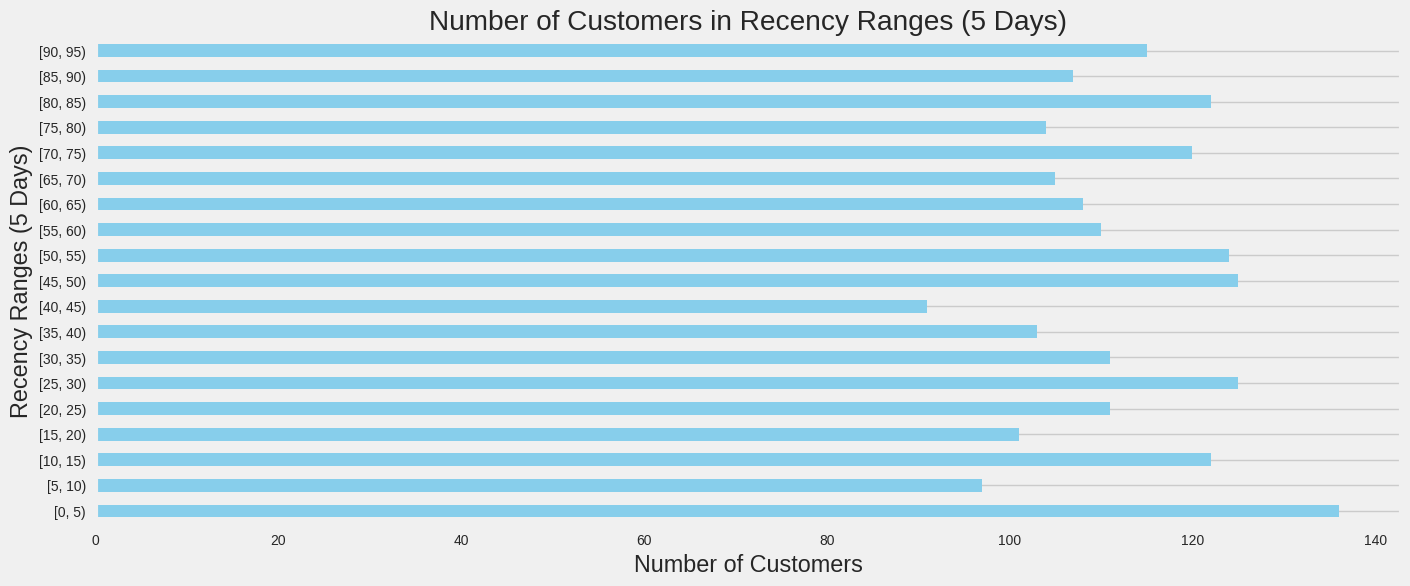

In [ ]:
# Define the range of 5 days
range_5_days = range(0, df['Recency'].max() + 1, 5)

# Create bins for the 'Recency' column
df['Recency_bins'] = pd.cut(df['Recency'], bins=range_5_days, right=False)

# Count the number of customers in each bin
recency_counts = df['Recency_bins'].value_counts().sort_index()

# Plot the barh plot
plt.figure(figsize=(15, 6))
recency_counts.plot(kind='barh' ,color='skyblue')
plt.title('Number of Customers in Recency Ranges (5 Days)')
plt.xlabel('Number of Customers')
plt.ylabel('Recency Ranges (5 Days)')
plt.grid(axis='x')
plt.show()

creating features

In [ ]:
# Calculate the total amount spent by each customer
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Display the DataFrame with the new 'Total_Spent' column
df.head(4)

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Recency_bins,Total_Spent
Dt_Customer,,,,,,,,,,,,,,,,,,,,,
01-01-2013,8162,68,Master,Together,14661.0,0,0,88,4,1,...,0,0,0,0,0,3,11,0,"[85, 90)",26
01-01-2013,7261,53,Graduation,Together,34600.0,1,1,8,199,33,...,0,0,0,0,0,3,11,1,"[5, 10)",318
01-01-2013,2452,53,Graduation,Together,34600.0,1,1,8,199,33,...,0,0,0,0,0,3,11,1,"[5, 10)",318
01-01-2013,10637,60,Graduation,Married,40800.0,1,2,77,24,0,...,0,0,0,0,1,3,11,0,"[75, 80)",99


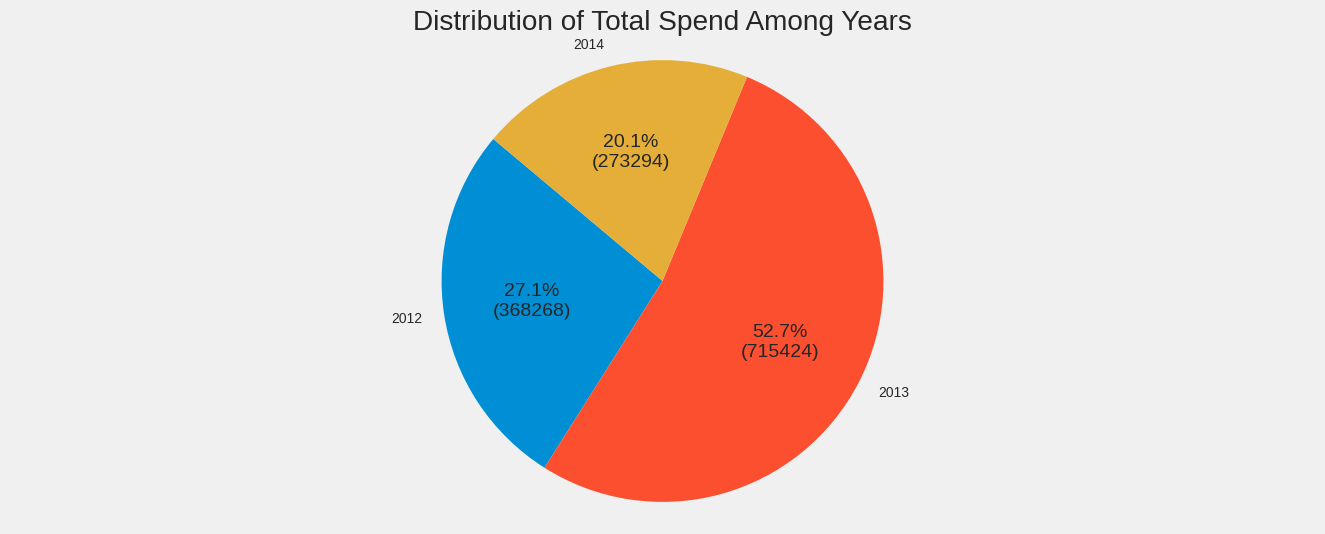

In [ ]:
# Convert the index to datetime format
df.index = pd.to_datetime(df.index)

# Extract year from the index (date of customer enrollment)
df['Year'] = df.index.year

# Calculate the total spend for each year
total_spend_per_year = df.groupby('Year')['Total_Spent'].sum()

# Plot
plt.figure(figsize=(15, 6))
plt.pie(total_spend_per_year, labels=total_spend_per_year.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*total_spend_per_year.sum())})", startangle=140)
plt.title('Distribution of Total Spend Among Years')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

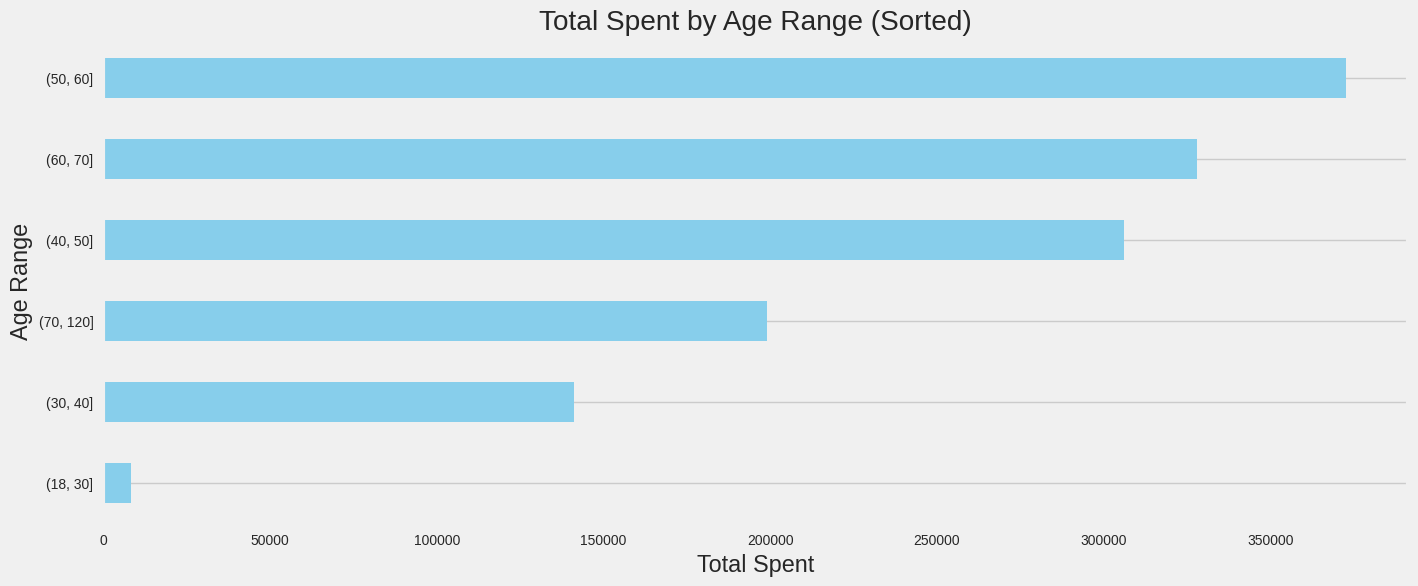

In [ ]:

# Define age ranges
age_bins = [18, 30, 40, 50, 60, 70, 120]  # Define your own age ranges

# Create bins for the 'Age' column
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)

# Group the DataFrame by the age bins and calculate the total spent for each age range
total_spent_by_age_range = df.groupby('Age_Group')['Total_Spent'].sum()

# Sort the results by total spent from lowest to highest
total_spent_by_age_range_sorted = total_spent_by_age_range.sort_values()

# Plot
plt.figure(figsize=(15, 6))
total_spent_by_age_range_sorted.plot(kind='barh', color='skyblue')
plt.title('Total Spent by Age Range (Sorted)')
plt.xlabel('Total Spent')
plt.ylabel('Age Range')
plt.grid(axis='x')
plt.show()

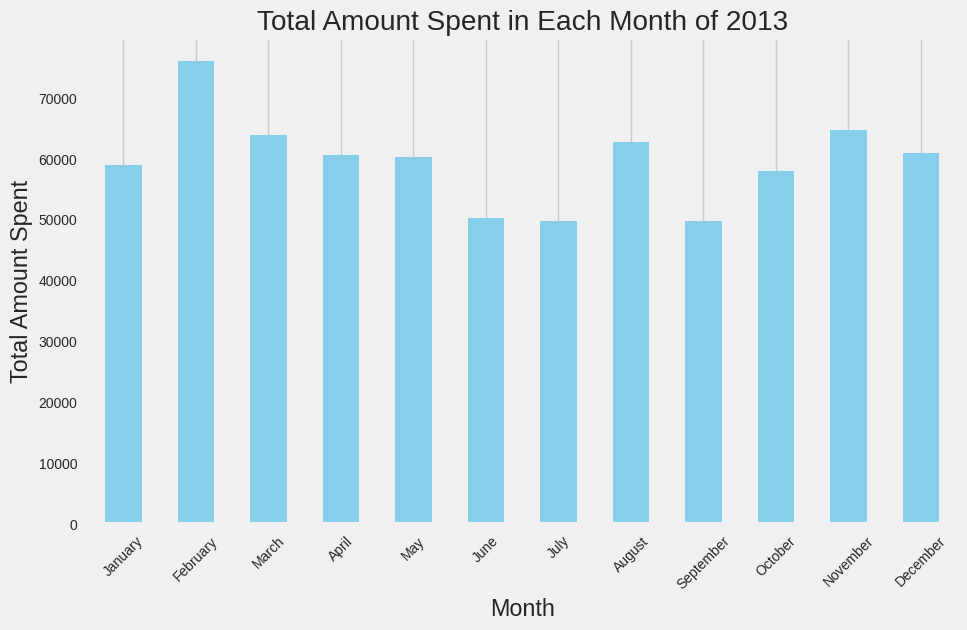

In [ ]:

# Filter the DataFrame to include only the data for the year 2013
df_2013 = df['2013']

# Group the filtered DataFrame by month and calculate the total amount spent in each month
total_spent_by_month_2013 = df_2013.resample('M').sum()

# Filter the DataFrame to include only the data for the year 2013
df_2013 = df['2013']

# Group the filtered DataFrame by month and calculate the total amount spent in each month
total_spent_by_month_2013 = df_2013.resample('M').sum()

# Plot
plt.figure(figsize=(10, 6))
total_spent_by_month_2013['Total_Spent'].plot(kind='bar', color='skyblue')
plt.title('Total Amount Spent in Each Month of 2013')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')

# Set month names as x-axis ticks
month_names = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(range(12), month_names, rotation=45)

plt.grid(axis='y')
plt.show()

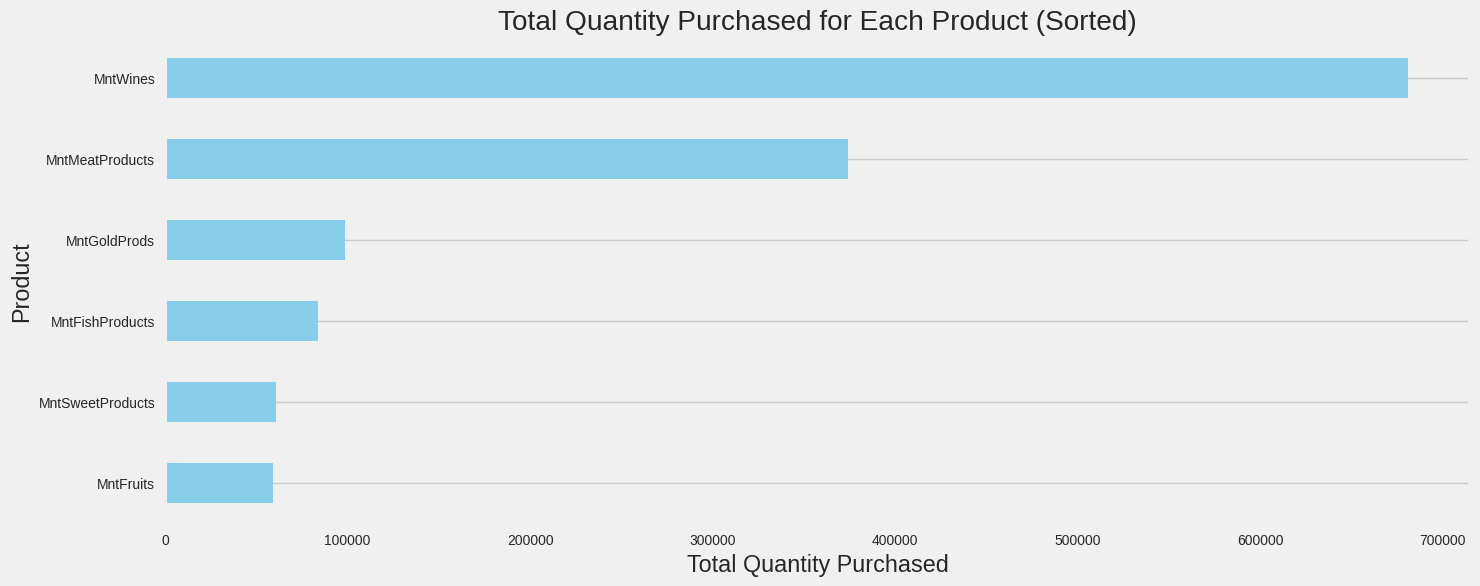

In [ ]:

# Calculate the total quantity purchased for each product
total_quantity_purchased = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                               'MntSweetProducts', 'MntGoldProds']].sum()

# Sort the total quantity purchased from lowest to highest
total_quantity_purchased_sorted = total_quantity_purchased.sort_values()

# Plot
plt.figure(figsize=(15, 6))
total_quantity_purchased_sorted.plot(kind='barh', color='skyblue')
plt.title('Total Quantity Purchased for Each Product (Sorted)')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Product')
plt.grid(axis='x')
plt.show()



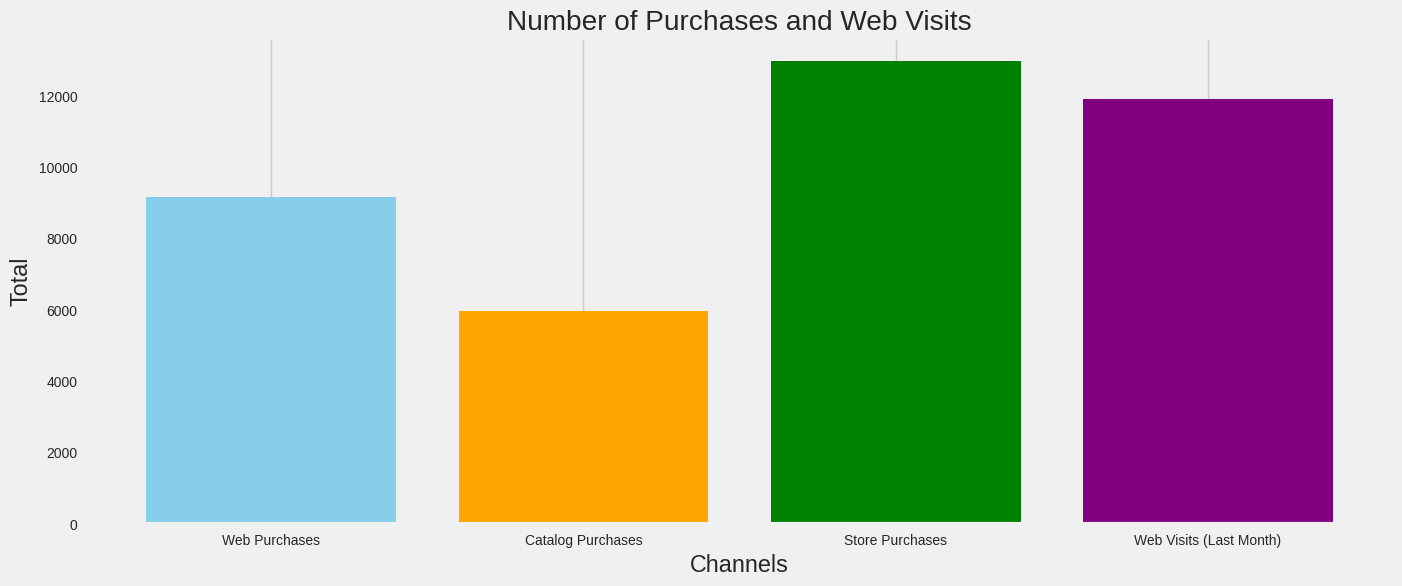

In [ ]:
# Calculate the total number of purchases made through different channels
total_web_purchases = df['NumWebPurchases'].sum()
total_catalog_purchases = df['NumCatalogPurchases'].sum()
total_store_purchases = df['NumStorePurchases'].sum()

# Calculate the total number of visits to the company's website in the last month
total_web_visits = df['NumWebVisitsMonth'].sum()

# Plot
channels = ['Web Purchases', 'Catalog Purchases', 'Store Purchases', 'Web Visits (Last Month)']
totals = [total_web_purchases, total_catalog_purchases, total_store_purchases, total_web_visits]

plt.figure(figsize=(15, 6))
plt.bar(channels, totals, color=['skyblue', 'orange', 'green', 'purple'])
plt.title('Number of Purchases and Web Visits')
plt.xlabel('Channels')
plt.ylabel('Total')
plt.grid(axis='y')
plt.show()


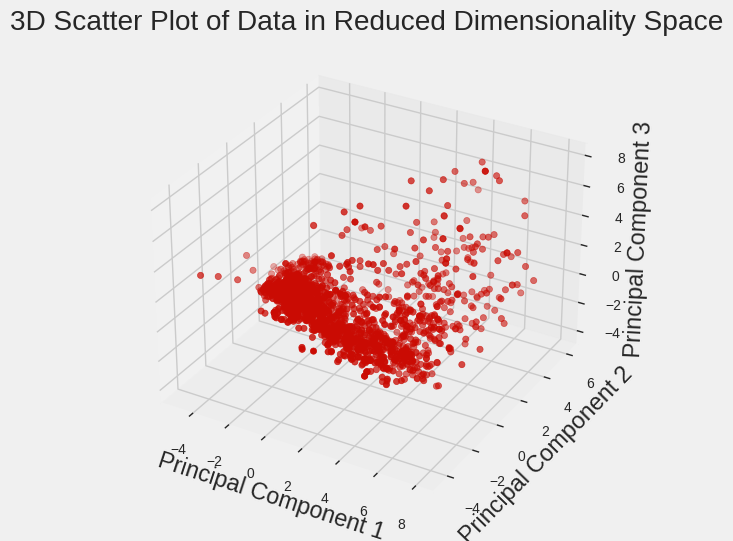

Explained Variance Ratio: [0.31043016 0.08037951 0.07485427]
Cumulative Explained Variance Ratio: [0.31043016 0.39080967 0.46566395]


In [ ]:
df = df.drop(columns=['Education', 'Marital_Status'])

# Convert non-numeric columns to numeric if possible
df = df.apply(pd.to_numeric, errors='ignore')

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Perform PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

# Visualize the data in the reduced dimensionality space
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c='r', marker='o')

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of Data in Reduced Dimensionality Space')

# Show plot
plt.show()

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio)


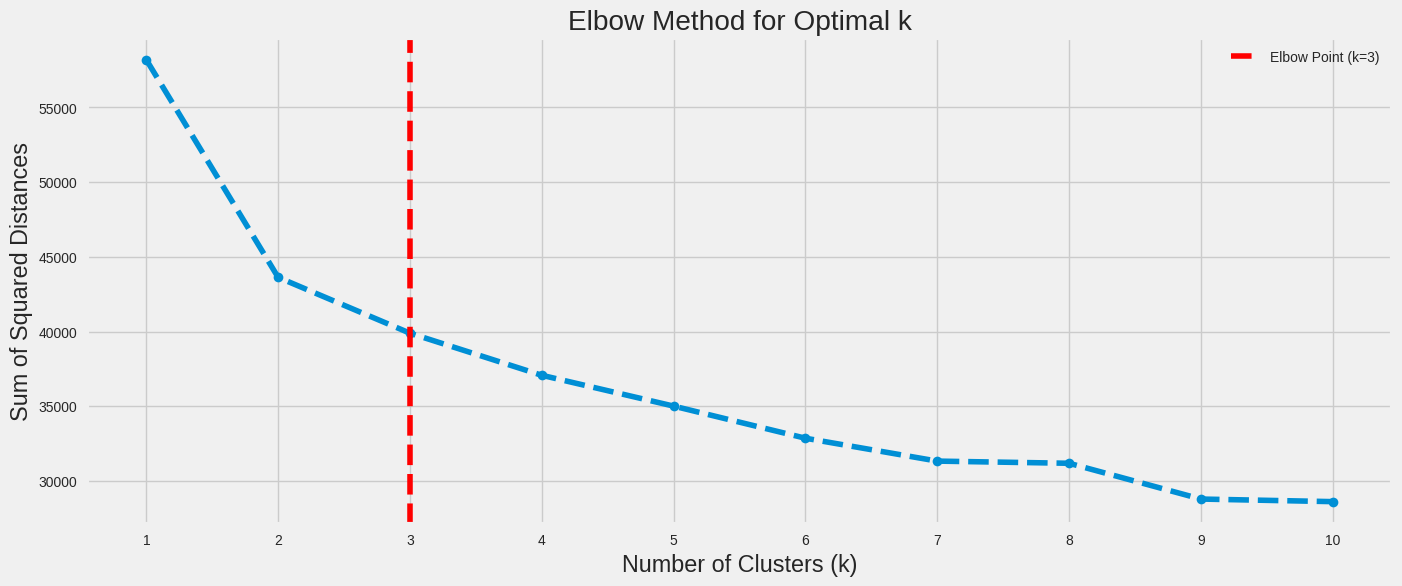

In [ ]:
# Use the Elbow Method to find the optimal number of clusters (k=4)
inertia_values = []
k_values = range(1, 11)  # Test for values of k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Assuming 'data' is the standardized data
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(15, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)

# Find the elbow point using KneeLocator
knee = KneeLocator(k_values, inertia_values, curve='convex', direction='decreasing')
elbow_point = knee.elbow

# Highlight the elbow point on the plot
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Elbow Point (k={elbow_point})')
plt.legend()

plt.show()


We use the KneeLocator from the kneed library to identify the elbow point programmatically.
The curve='convex' parameter specifies that we are looking for a convex curve.
The direction='decreasing' parameter indicates that the curve is decreasing (inertia values are decreasing).
We add a vertical dashed line at the elbow point and label it on the plot for better visualization.

Apply Agglomerative Clustering:



In [ ]:
# Assuming 'data' contains your standardized data
agglomerative_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = agglomerative_cluster.fit_predict(X)


Visualize the distribution of clusters:



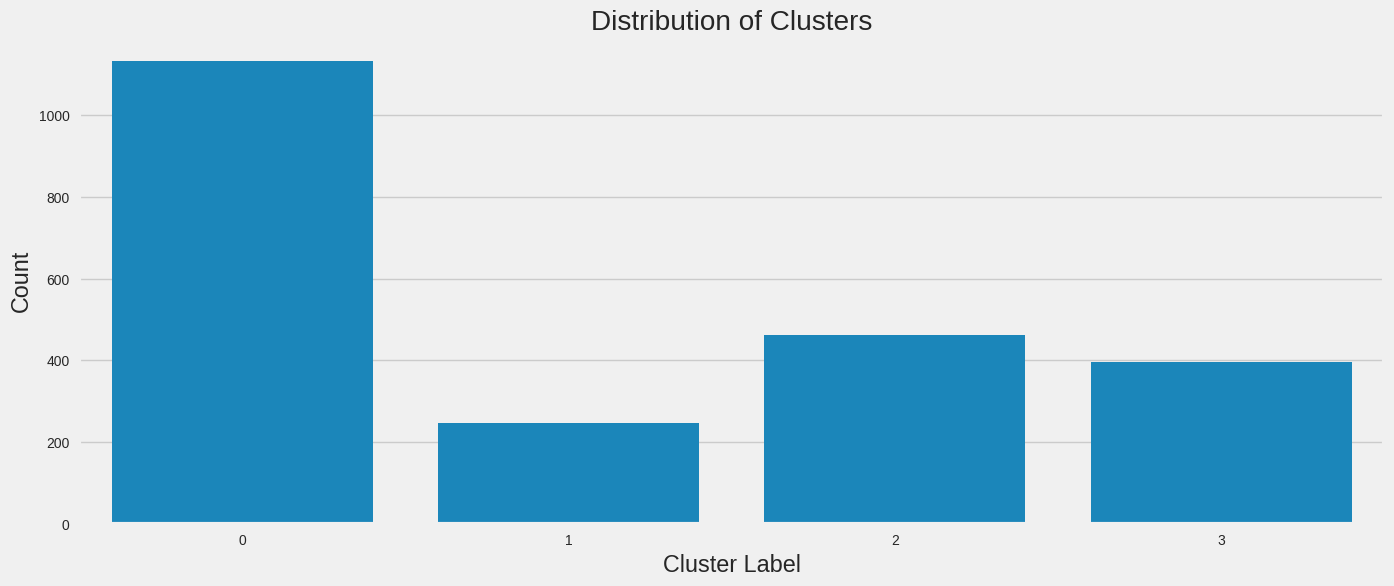

In [ ]:
# Create a countplot of cluster labels
plt.figure(figsize=(15, 6))
sns.countplot(x=cluster_labels)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()


Visualize the clusters in reduced 3D space:

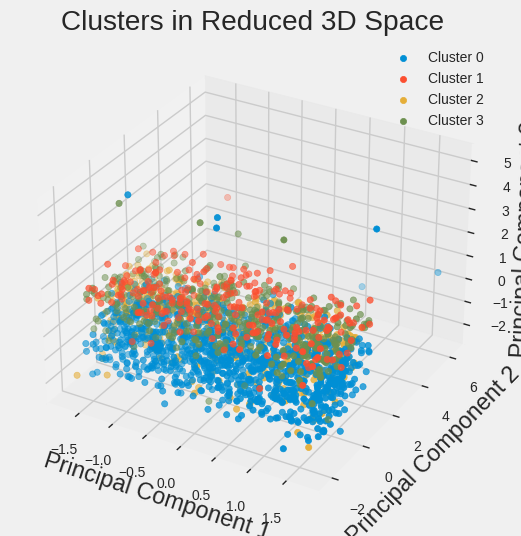

In [ ]:
# Assuming 'reduced_data' contains your reduced 3D space data
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in set(cluster_labels):
    cluster_data = X[cluster_labels == cluster_label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster_label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Clusters in Reduced 3D Space')
ax.legend()

plt.show()


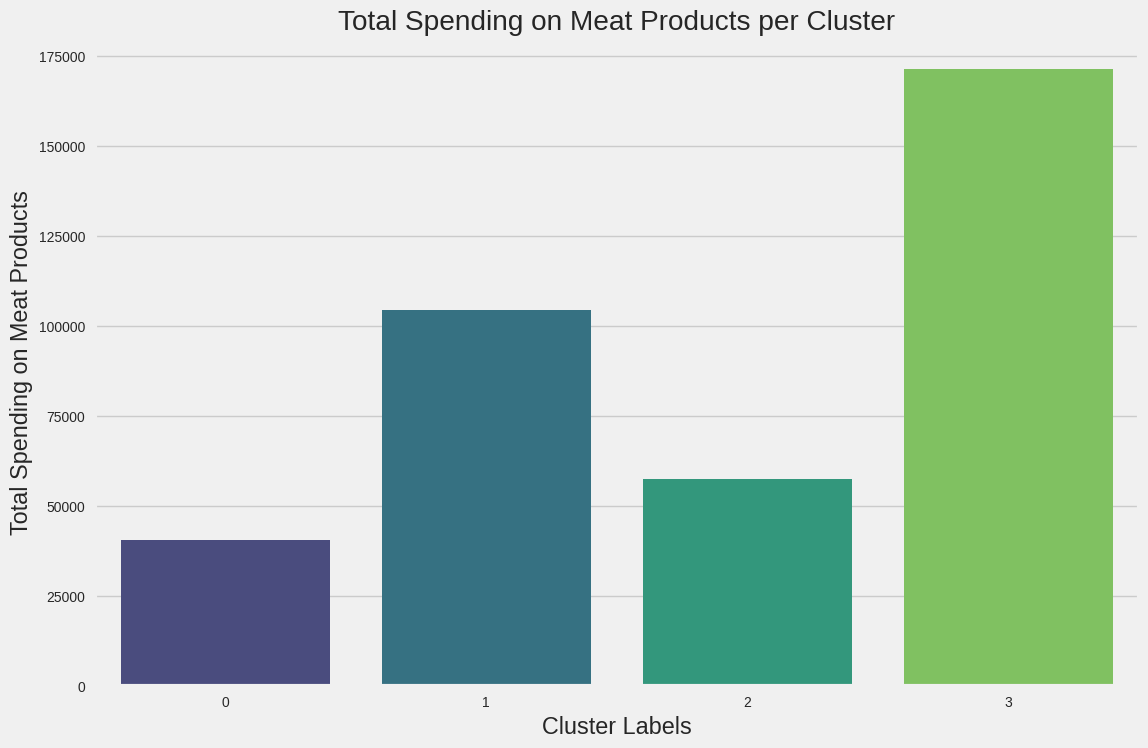

In [ ]:
# Step 3: Assign cluster labels to the data points
df['Cluster_Labels'] = cluster_labels

# Step 4: Group by cluster labels and calculate total spending for each product category
total_spending_per_cluster = df.groupby('Cluster_Labels')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                            'MntFishProducts', 'MntSweetProducts',
                                                            'MntGoldProds']].sum().reset_index()

# Step 5: Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=total_spending_per_cluster, x='Cluster_Labels', y='MntMeatProducts', palette='viridis')
plt.title('Total Spending on Meat Products per Cluster')
plt.xlabel('Cluster Labels')
plt.ylabel('Total Spending on Meat Products')
plt.show()


In [ ]:
# Map cluster labels to cluster names
cluster_names = {
    0: "Wine Enthusiasts",
    1: "Health-Conscious Shoppers",
    2: "Gourmet Food Lovers",
    3: "Gold Products Aficionados"
}

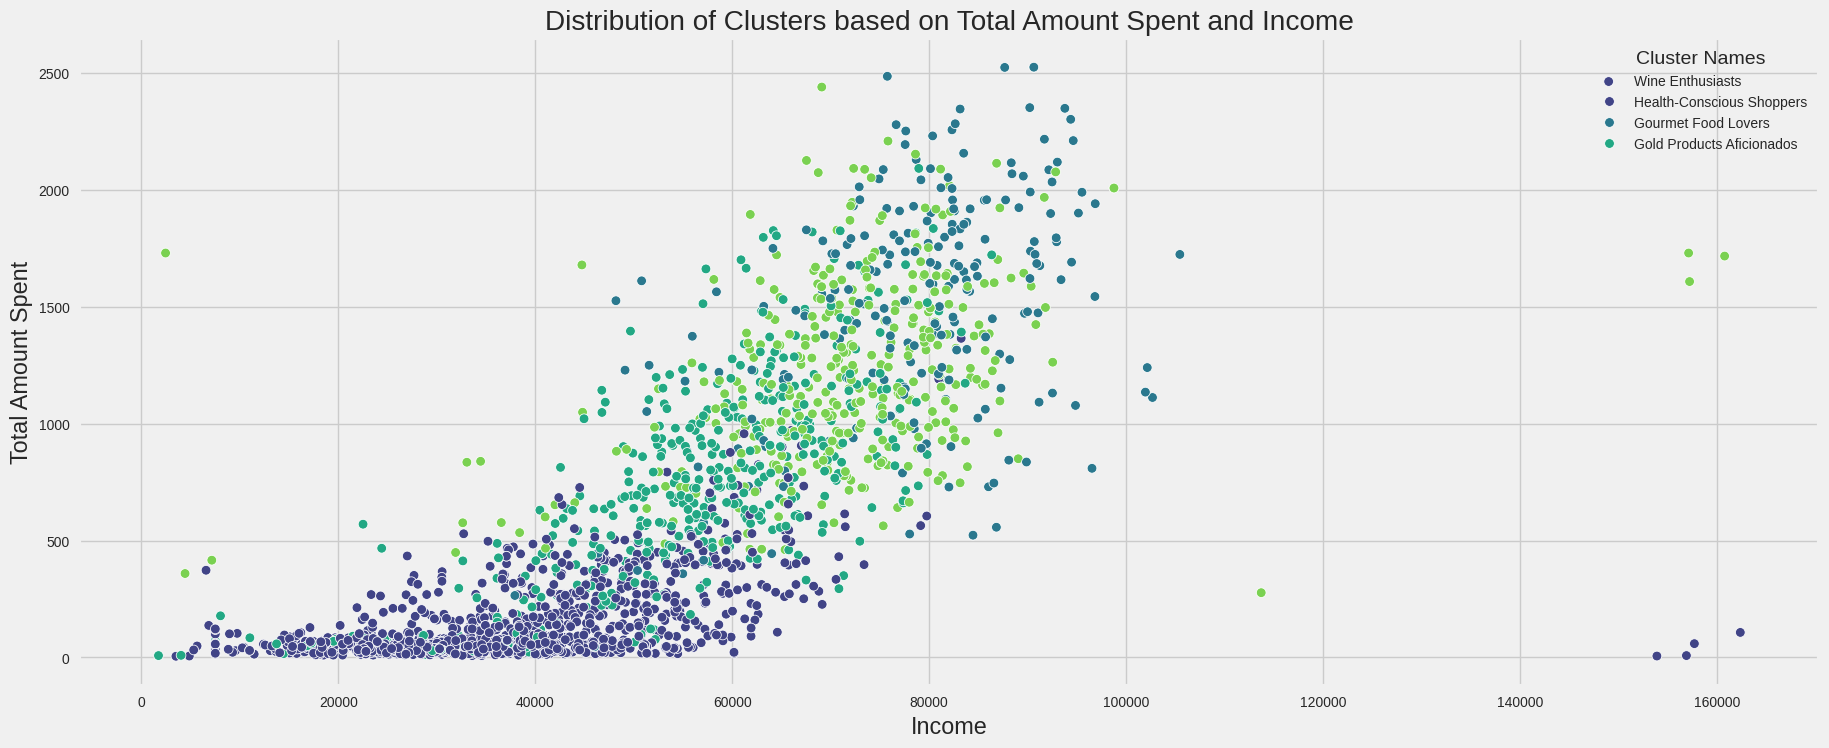

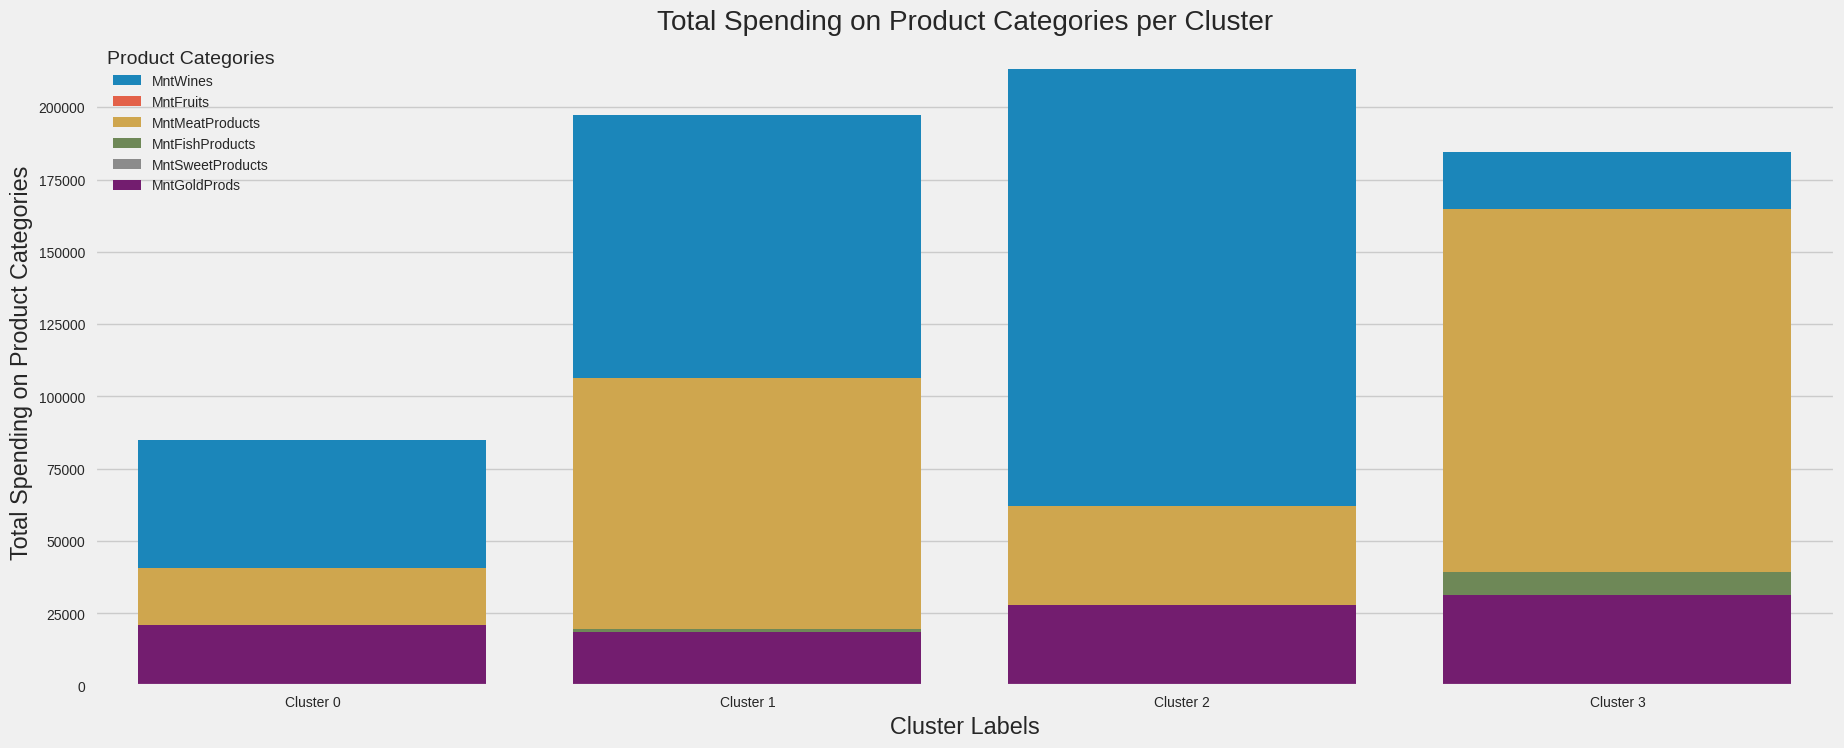

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the provided data description

# Step 1: Calculate Total Amount Spent
df['Total_Amount_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Step 2: Distribution of Clusters
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df, x='Income', y='Total_Amount_Spent', hue='Cluster_Labels', palette='viridis')
plt.title('Distribution of Clusters based on Total Amount Spent and Income')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.legend(title='Cluster Names', labels=["Wine Enthusiasts", "Health-Conscious Shoppers", "Gourmet Food Lovers", "Gold Products Aficionados"])
plt.show()

# Group by cluster labels and calculate total spending for each product category
total_spending_per_cluster = df.groupby('Cluster_Labels')[product_categories].sum().reset_index()

# Step 4: Bar Plot
plt.figure(figsize=(20, 8))
for idx, category in enumerate(product_categories):
    sns.barplot(data=total_spending_per_cluster, x='Cluster_Labels', y=category, label=category)
plt.title('Total Spending on Product Categories per Cluster')
plt.xlabel('Cluster Labels')
plt.ylabel('Total Spending on Product Categories')
plt.legend(title='Product Categories')
plt.show()


In [ ]:
# Step 1: Identify Clusters with Preferences for Specific Product Categories
mean_spending_per_cluster = df.groupby('Cluster_Labels')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Step 2: Suggest Potential Market Segments
# Analyze spending behavior by examining cluster characteristics
cluster_characteristics = df.groupby('Cluster_Labels').agg({'Income': 'mean', 'Marital_Status': lambda x: x.mode()[0], 'Education': lambda x: x.mode()[0]})
cluster_characteristics['Cluster_Size'] = df['Cluster_Labels'].value_counts()
print(cluster_characteristics)

# Step 3: Conduct Further Analysis on High-Income Customers' Marital Status Distribution
high_income_customers = df[df['Income'] > df['Income'].quantile(0.75)]  # Subset high-income customers
high_income_marital_status_distribution = high_income_customers['Marital_Status'].value_counts(normalize=True)
high_income_marital_status_distribution.head()


                      Income Marital_Status   Education  Cluster_Size
Cluster_Labels                                                       
0               38223.711386        Married  Graduation          1133
1               78211.033058        Married  Graduation           242
2               54763.004673        Married  Graduation           428
3               71771.382151        Married  Graduation           437


Married     0.378571
Together    0.260714
Single      0.217857
Divorced    0.105357
Widow       0.035714
Name: Marital_Status, dtype: float64

<Figure size 1200x800 with 0 Axes>

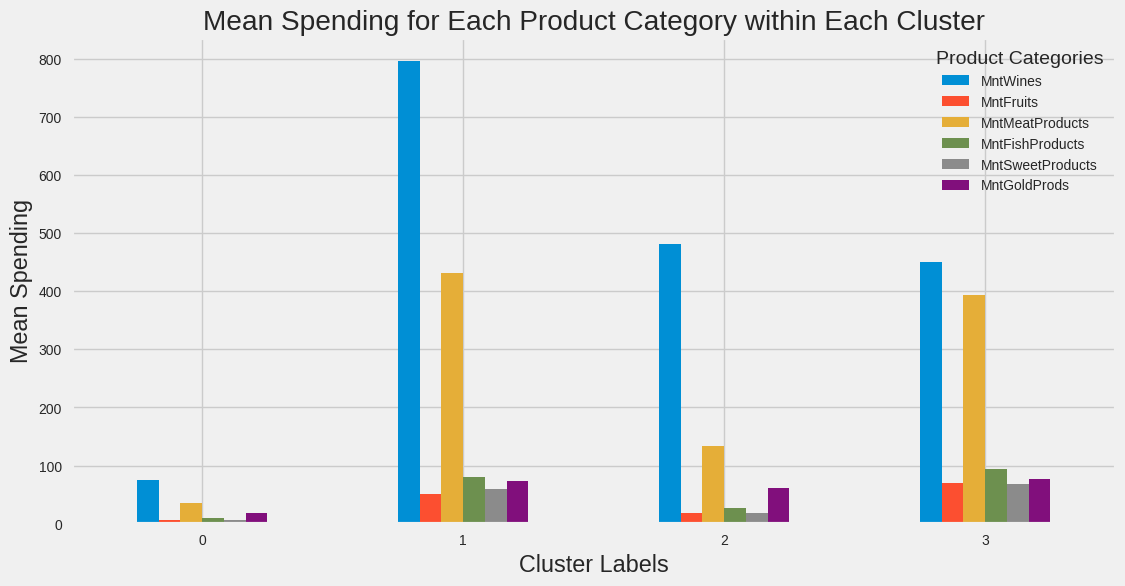

In [ ]:
# Step 1: Visualize Mean Spending for Each Product Category within Each Cluster
plt.figure(figsize=(12, 8))
mean_spending_per_cluster.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Spending for Each Product Category within Each Cluster')
plt.xlabel('Cluster Labels')
plt.ylabel('Mean Spending')
plt.xticks(rotation=0)
plt.legend(title='Product Categories')
plt.show()

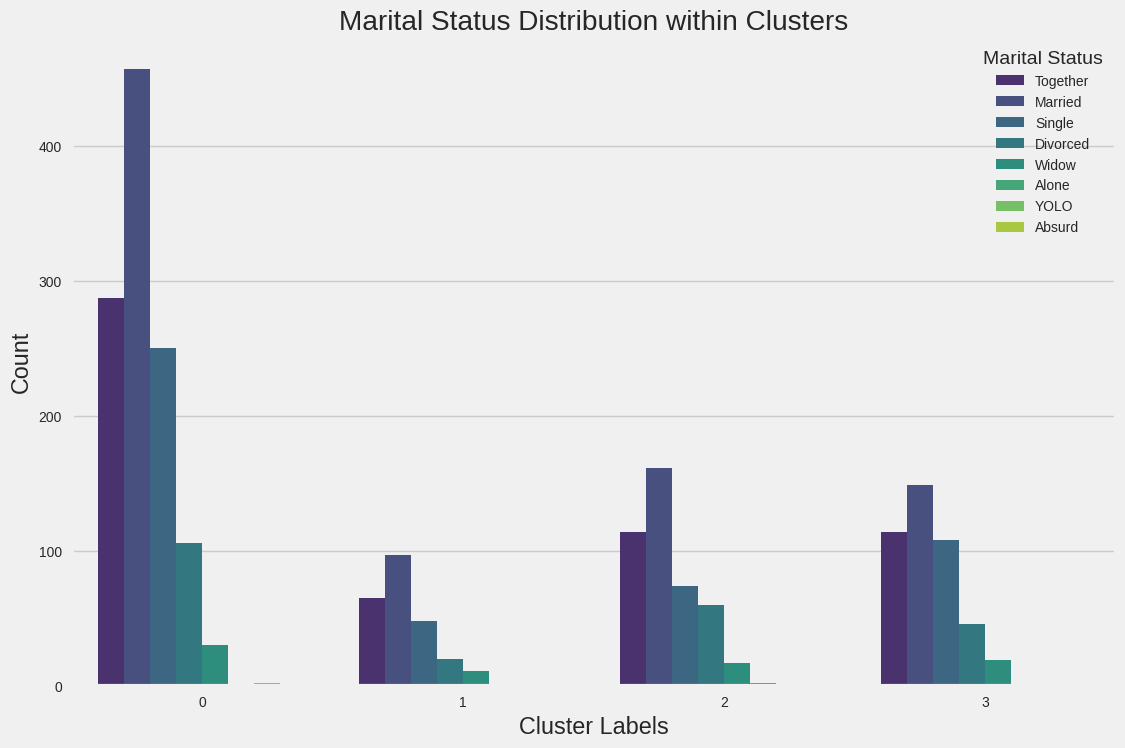

In [ ]:
# Step 2: Visualize Cluster Characteristics
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Cluster_Labels', hue='Marital_Status', palette='viridis')
plt.title('Marital Status Distribution within Clusters')
plt.xlabel('Cluster Labels')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()

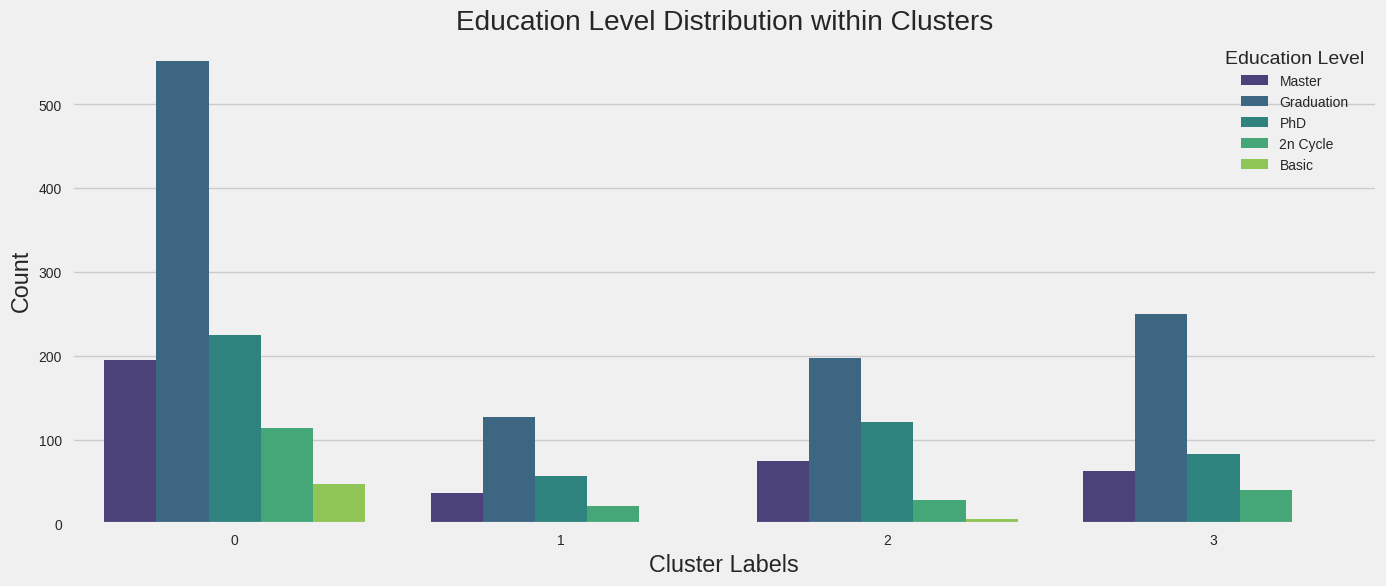

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Cluster_Labels', hue='Education', palette='viridis')
plt.title('Education Level Distribution within Clusters')
plt.xlabel('Cluster Labels')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.show()

dropping some value which tend to be outlier in plotting the the income distribution among clusters

In [ ]:
# Create a copy of the original DataFrame
df_filtered = df.copy()

# Iterate over each cluster
for cluster_label in df_filtered['Cluster_Labels'].unique():
    # Identify data points in the current cluster with a value over 120000
    cluster_data_over_limit = df_filtered[(df_filtered['Cluster_Labels'] == cluster_label) & (df_filtered['Income'] > 120000)]

    # Drop these data points from the current cluster
    df_filtered.drop(cluster_data_over_limit.index, inplace=True)

# Verify that the data points have been dropped
print("Number of data points with income over 120000 dropped:", len(df) - len(df_filtered))


Number of data points with income over 120000 dropped: 41


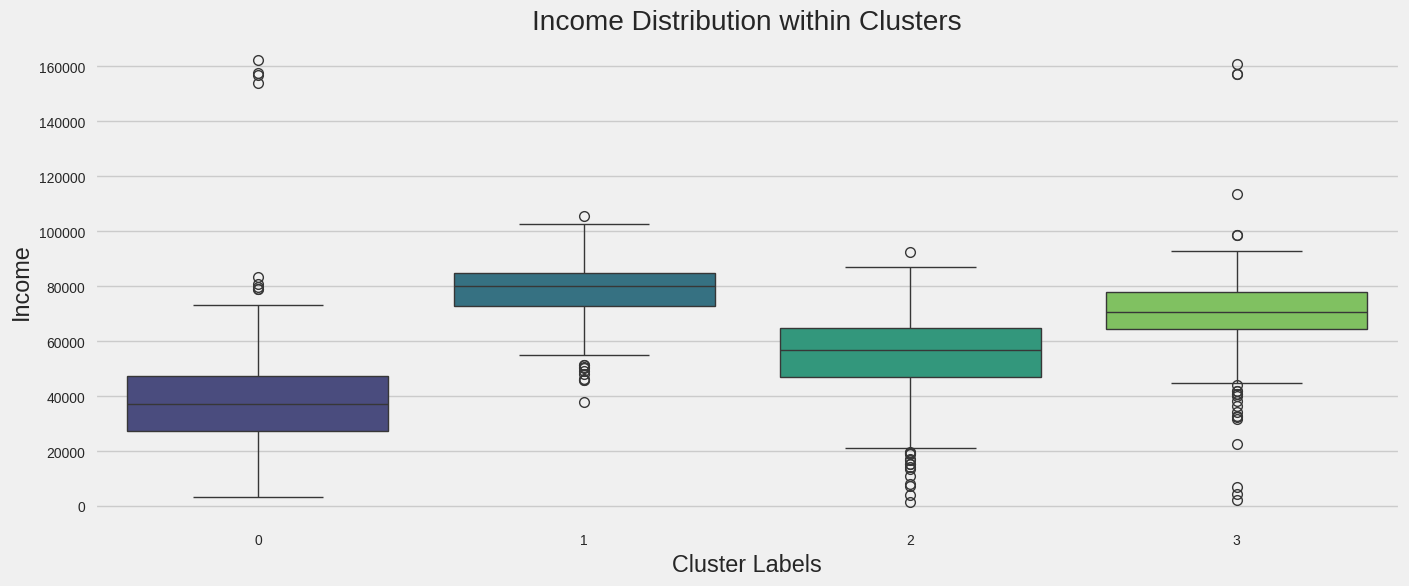

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Cluster_Labels', y='Income', palette='viridis')
plt.title('Income Distribution within Clusters')
plt.xlabel('Cluster Labels')
plt.ylabel('Income')
plt.show()

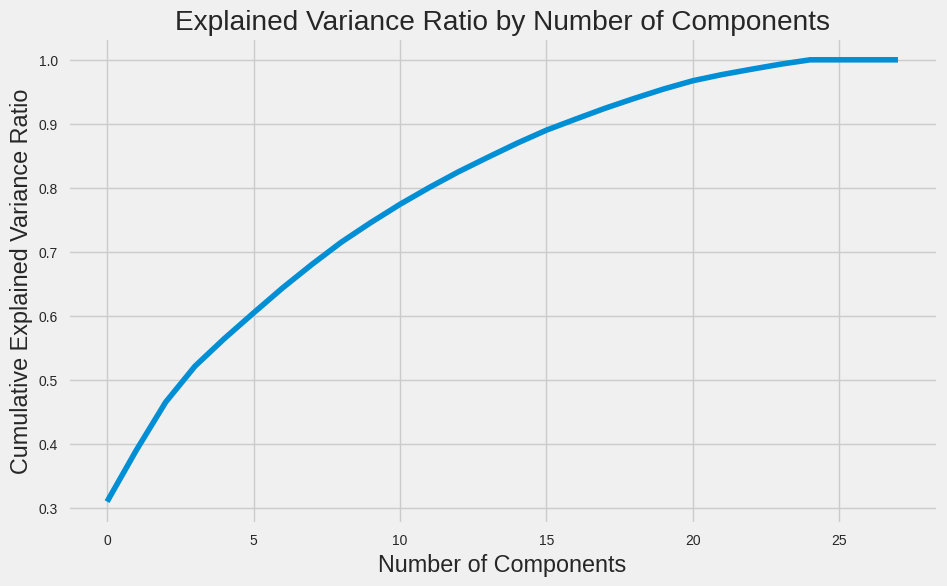

In [ ]:
from sklearn.decomposition import PCA


# Perform PCA
pca = PCA()
pca.fit(X)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()